# Weather Patterns Around the Equator 
---
## Observations
- There are does seem to be an obvious correlation between latitude and temperature as all 3 plots of temp and its min/max values show
- There seems to be no relationship between latitude and "cloudiness"
- While there doesn't seem to be an apparent relationship between latitude and wind speed or latitude and humidity, they do seem to compliment each other or have an inverse relationship.

---
### Set Up

In [1]:
# Dependencies
import pandas as pd
import requests
from datetime import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import api_keys
import json
import seaborn as sns
from pprint import pprint
from citipy import citipy
from pandas.io.json import json_normalize

In [2]:
# location for save file
now = datetime.now()
ymd = now.strftime("%Y-%m-%d")

savefile = "Output/" + ymd + "_WeatherSample.csv"
savefile

'Output/2018-09-28_WeatherSample.csv'

In [3]:
# Coordinate Limits
lat_range = (-90.0, 90.0)
lon_range = (-180.0, 180.0)

# Sample size variables
target_size = 500
land_pct = .29
pool = round(target_size / land_pct)

# Container for sample cities
city_list = []

# Url for API calls
f = "imperial"   
c = "metric"
k = "standard"
owm_url = (f"http://api.openweathermap.org/data/2.5/weather?appid={api_keys.owm}&units={f}&q=")

---
### ID Locations for Testing

In [4]:
def rand_cities(size):
    # Generate random numbers for lat/lon coords
    rand_lat = np.random.uniform(lat_range[0], lat_range[1], size=size)
    rand_lon = np.random.uniform(lon_range[0], lon_range[1], size=size)
    
    # Container for return values
    results = []
    
    # Get our sample of cities
    for i in np.arange(size):
    
        # Find the closest city to our coord pairs
        city = citipy.nearest_city(rand_lat[i], rand_lon[i]).city_name
    
        # Add to list if it's unique
        if city not in results:
            results.append(city)
            
    # Return the resulting find        
    return results

In [5]:
# Find at least 500 random unique cities to test on
while(len(city_list) < 500):
    city_list = rand_cities(pool)
    
# Check the size of our sample
city_count = len(city_list)
print(f"{city_count} unique cities out of {pool} random queries found!")

684 unique cities out of 1724 random queries found!


In [6]:
for i in city_list:
    print(i)

tulagi
tasiilaq
sabang
chuy
ornskoldsvik
bambous virieux
puerto ayora
lakatoro
hurghada
cape town
sayyan
poronaysk
inhambane
dawei
terme
hobart
east london
khorixas
mar del plata
honiara
ihtiman
karratha
butaritari
ilulissat
saskylakh
college
antalaha
albany
yerbogachen
ushuaia
thompson
nueve de julio
timbiqui
tsihombe
dujuma
watertown
codrington
goderich
rikitea
yellowknife
port alfred
dukat
atuona
ribeira grande
chokurdakh
cabo san lucas
castro
qaanaaq
ponta do sol
ossora
belushya guba
partizanskoye
coromoro
taolanaro
nuuk
ambositra
sola
cherskiy
sekoma
ayan
ancud
sao filipe
sitka
punta arenas
cayenne
payo
kapaa
ballina
necochea
geraldton
pahrump
busselton
dashitou
guaranda
aflu
tezu
hilo
attawapiskat
tessalit
berlevag
phulabani
olafsvik
upernavik
tuktoyaktuk
barrow
pevek
iqaluit
chagda
zyryanovskiy
katsuura
selaphum
sao felix do xingu
suluktu
hermanus
clearwater
thunder bay
bengkulu
zemetchino
nizhneyansk
tsienyane
kuche
port lincoln
tuatapere
sao joao da barra
yulara
soe
cap malheu

---
### Check Weather for Locations

In [43]:
response = requests.get(owm_url+"hong kong")

In [44]:
print(response.status_code==200)

True


In [45]:
weather = response.json()
pprint(weather)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 22.28, 'lon': 114.16},
 'dt': 1538184600,
 'id': 1819729,
 'main': {'humidity': 57,
          'pressure': 1010,
          'temp': 79.95,
          'temp_max': 80.6,
          'temp_min': 78.8},
 'name': 'Hong Kong',
 'sys': {'country': 'CN',
         'id': 7888,
         'message': 0.0042,
         'sunrise': 1538172842,
         'sunset': 1538215993,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 12.75}}


In [46]:
df_test = pd.DataFrame(json_normalize(weather))
df_test

,base,clouds.all,cod,coord.lat,coord.lon,dt,id,main.humidity,main.pressure,main.temp,...,sys.country,sys.id,sys.message,sys.sunrise,sys.sunset,sys.type,visibility,weather,wind.deg,wind.speed
0,stations,20,200,22.28,114.16,1538184600,1819729,57,1010,79.95,...,CN,7888,0.0042,1538172842,1538215993,1,10000,"[{'id': 801, 'main': 'Clouds', 'description': ...",350,12.75


In [11]:
# Counter that prints a "right-aligned" result of uniform spaces
def status_frmct(position, size):
    diff = len(str(size)) - len(str(position))
    result = ""
    
    for i in np.arange(diff):
        result += " "
    
    return result + (f"{position}/{size}")

In [12]:
# Prints the last "number" of messages in an array
def print_last(queue, number):
    last = len(queue)
    for i in np.arange(last-number, last):
        print(queue[i])
    return

In [13]:
# Returns spacers for aligning print
def pretty_sp(longest, current):
    result = ""
    diff = len(longest) - len(current)
    for i in np.arange(diff):
        result += " "

    return result

In [14]:
# Log the status of the API calls
separator = "--------------------------------------------------"
api_call_log = ["Attempting to Retrieve data...", separator]
print_last(api_call_log, 2)

# Variables for helping with tracking/containing call results
attempt = 1
found = 0
weather_list = []
longest_city_name = max(city_list, key=len)

# Run an API call for each city in our sample
for city in city_list:
    status = (f"Attempt on call {status_frmct(attempt,city_count)}: {city.title()} {pretty_sp(longest_city_name, city)}>>>   ")
    response = requests.get(owm_url + city)
    
    if (response.status_code == 200):
        found += 1
        status += "Success."
        weather_list.append(response.json())
    else:
        status += (f"Error {response.status_code}!")
    
    # Print a status update for each city
    api_call_log.append(status)
    print(status)
    
    # Create a delay so that the max number of openweathermap api calls is not exceeded (60/min)
    if((attempt%60) == 0):
        api_call_log.append(separator)
        api_call_log.append("Maximum number of calls per minute in OpenWeatherMap.org made.  Waiting for cooldown.")
        api_call_log.append(separator)
        print_last(api_call_log, 3)
        time.sleep(60)
        
    attempt += 1

api_call_log.append(separator)
api_call_log.append(f"Calls completed! Found {found} out of {city_count} records.")
print_last(api_call_log, 2)

Attempting to Retrieve data...
--------------------------------------------------
Attempt on call   1/684: Tulagi                       >>>   Error 404!
Attempt on call   2/684: Tasiilaq                     >>>   Success.
Attempt on call   3/684: Sabang                       >>>   Success.
Attempt on call   4/684: Chuy                         >>>   Success.
Attempt on call   5/684: Ornskoldsvik                 >>>   Success.
Attempt on call   6/684: Bambous Virieux              >>>   Success.
Attempt on call   7/684: Puerto Ayora                 >>>   Success.
Attempt on call   8/684: Lakatoro                     >>>   Success.
Attempt on call   9/684: Hurghada                     >>>   Error 404!
Attempt on call  10/684: Cape Town                    >>>   Success.
Attempt on call  11/684: Sayyan                       >>>   Success.
Attempt on call  12/684: Poronaysk                    >>>   Success.
Attempt on call  13/684: Inhambane                    >>>   Success.
Attempt on call  

Attempt on call 116/684: Kruisfontein                 >>>   Success.
Attempt on call 117/684: Vila Velha                   >>>   Success.
Attempt on call 118/684: Yirol                        >>>   Error 404!
Attempt on call 119/684: Hofn                         >>>   Success.
Attempt on call 120/684: Gat                          >>>   Success.
--------------------------------------------------
Maximum number of calls per minute in OpenWeatherMap.org made.  Waiting for cooldown.
--------------------------------------------------
Attempt on call 121/684: Portland                     >>>   Success.
Attempt on call 122/684: Makakilo City                >>>   Success.
Attempt on call 123/684: Kaunas                       >>>   Success.
Attempt on call 124/684: Longyearbyen                 >>>   Success.
Attempt on call 125/684: Vaini                        >>>   Success.
Attempt on call 126/684: Mount Gambier                >>>   Success.
Attempt on call 127/684: Ostrovnoy                 

Attempt on call 229/684: Maragogi                     >>>   Success.
Attempt on call 230/684: Mastic Beach                 >>>   Success.
Attempt on call 231/684: Barentsburg                  >>>   Error 404!
Attempt on call 232/684: Dingle                       >>>   Success.
Attempt on call 233/684: Yar-Sale                     >>>   Success.
Attempt on call 234/684: Te Anau                      >>>   Success.
Attempt on call 235/684: One Hundred Mile House       >>>   Error 404!
Attempt on call 236/684: Khatanga                     >>>   Success.
Attempt on call 237/684: Nsanje                       >>>   Success.
Attempt on call 238/684: Khairagarh                   >>>   Success.
Attempt on call 239/684: Todos Santos                 >>>   Success.
Attempt on call 240/684: Sechura                      >>>   Success.
--------------------------------------------------
Maximum number of calls per minute in OpenWeatherMap.org made.  Waiting for cooldown.
-------------------------------

Attempt on call 344/684: Muros                        >>>   Success.
Attempt on call 345/684: Mazamari                     >>>   Success.
Attempt on call 346/684: Svetlogorsk                  >>>   Success.
Attempt on call 347/684: Dhidhdhoo                    >>>   Success.
Attempt on call 348/684: Nioro                        >>>   Success.
Attempt on call 349/684: Dicabisagan                  >>>   Success.
Attempt on call 350/684: Sinnamary                    >>>   Success.
Attempt on call 351/684: Lucea                        >>>   Success.
Attempt on call 352/684: Shache                       >>>   Success.
Attempt on call 353/684: Marsaxlokk                   >>>   Success.
Attempt on call 354/684: Nakhon Phanom                >>>   Success.
Attempt on call 355/684: Dunkirk                      >>>   Success.
Attempt on call 356/684: Lavrentiya                   >>>   Success.
Attempt on call 357/684: Ternate                      >>>   Success.
Attempt on call 358/684: Saryg-Sep

Attempt on call 459/684: Mokrous                      >>>   Success.
Attempt on call 460/684: Sompeta                      >>>   Success.
Attempt on call 461/684: Paita                        >>>   Success.
Attempt on call 462/684: Ambilobe                     >>>   Success.
Attempt on call 463/684: Novo Aripuana                >>>   Success.
Attempt on call 464/684: Itahari                      >>>   Error 404!
Attempt on call 465/684: Kavieng                      >>>   Success.
Attempt on call 466/684: Marcona                      >>>   Error 404!
Attempt on call 467/684: Pemangkat                    >>>   Error 404!
Attempt on call 468/684: Mirabad                      >>>   Success.
Attempt on call 469/684: Shchelyayur                  >>>   Error 404!
Attempt on call 470/684: Loa Janan                    >>>   Success.
Attempt on call 471/684: Namanga                      >>>   Success.
Attempt on call 472/684: Grand Gaube                  >>>   Success.
Attempt on call 473/684: Z

Attempt on call 572/684: Huarmey                      >>>   Success.
Attempt on call 573/684: Skalistyy                    >>>   Error 404!
Attempt on call 574/684: Vilyuysk                     >>>   Success.
Attempt on call 575/684: Hailey                       >>>   Success.
Attempt on call 576/684: Bafoulabe                    >>>   Success.
Attempt on call 577/684: Columbus                     >>>   Success.
Attempt on call 578/684: Westport                     >>>   Success.
Attempt on call 579/684: Palu                         >>>   Success.
Attempt on call 580/684: Morehead                     >>>   Success.
Attempt on call 581/684: Odessa                       >>>   Success.
Attempt on call 582/684: Montgomery                   >>>   Success.
Attempt on call 583/684: Potam                        >>>   Success.
Attempt on call 584/684: Vestmannaeyjar               >>>   Success.
Attempt on call 585/684: Jamkhed                      >>>   Success.
Attempt on call 586/684: Nalut  

In [15]:
df_weather = pd.DataFrame(json_normalize(weather_list))
df_weather.head()

,base,clouds.all,cod,coord.lat,coord.lon,dt,id,main.grnd_level,main.humidity,main.pressure,...,sys.id,sys.message,sys.sunrise,sys.sunset,sys.type,visibility,weather,wind.deg,wind.gust,wind.speed
0,stations,0,200,65.61,-37.64,1538182200,3424607,NaN,38,993.00,...,4806.0,0.0037,1538210078,1538251525,1.0,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",340.0000,14.4,20.80
1,stations,32,200,13.72,123.58,1538184080,1691355,1011.10,100,1011.10,...,NaN,0.0034,1538170500,1538213822,NaN,NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...",207.0020,NaN,5.17
2,stations,92,200,-33.69,-53.46,1538183836,3443061,1027.31,96,1027.31,...,NaN,0.0035,1538212415,1538256911,NaN,NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...",50.5018,NaN,23.40
3,stations,12,200,63.29,18.72,1538182200,2686469,NaN,86,1013.00,...,5406.0,0.0039,1538196435,1538238130,1.0,10000.0,"[{'id': 801, 'main': 'Clouds', 'description': ...",310.0000,NaN,6.93
4,stations,20,200,-20.34,57.76,1538182800,1106677,NaN,73,1020.00,...,6729.0,0.0032,1538185942,1538229996,1.0,10000.0,"[{'id': 801, 'main': 'Clouds', 'description': ...",110.0000,NaN,10.29


---
### Clean Up Data and Save to File

In [16]:
df_weather.count()

base               611
clouds.all         611
cod                611
coord.lat          611
coord.lon          611
dt                 611
id                 611
main.grnd_level    351
main.humidity      611
main.pressure      611
main.sea_level     351
main.temp          611
main.temp_max      611
main.temp_min      611
name               611
rain.1h              3
rain.3h             67
sys.country        611
sys.id             260
sys.message        611
sys.sunrise        611
sys.sunset         611
sys.type           260
visibility         248
weather            611
wind.deg           594
wind.gust           11
wind.speed         611
dtype: int64

In [17]:
# Extract columns with complete data.
df_cleaned_weather = df_weather[['name', 'sys.country', 
                                 'coord.lat', 'coord.lon', 
                                 'dt', 
                                 'weather',
                                 'main.temp', 'main.temp_max', 'main.temp_min', 
                                 'clouds.all', 
                                 'wind.speed',
                                 'main.humidity', 'main.pressure', 
                                 'sys.sunrise', 'sys.sunset', 
                                ]]
# Adjust column names
df_cleaned_weather.columns = ["Name", "Country", "Latitude", "Longitude", "DT", "Weather", 
                              "Temperature", "Max. Temperature", "Min. Temperature",  
                              "Clouds", "Wind Speed", "Humidity", "Pressure", "Sunrise", "Sunset"
                             ]

# Save findings to csv
df_cleaned_weather.to_csv(savefile)

In [31]:
with open("Output/OWM Call Log.txt", "w") as savelog:
    for line in api_call_log:
        savelog.write(line)

---
### Data Visualization
#### Latitude vs Temperature Plot

In [32]:
# Function for plotting owm dataframe data from cleanup
def owmdf_plt(xlbl, ylbl, units, cmap):
    # Extract lists for plotting
    xs = df_cleaned_weather[xlbl].tolist()
    ys = df_cleaned_weather[ylbl].tolist()
    
    # Define a color array for the cmap
    c = [(1-(i/100)) for i in ys]

    # Plot the data with a color map based on temperature out of 100
    plot = plt.scatter(xs, ys, c=c, cmap=cmap, edgecolor="black")

    # Clean up plot appearance
    plt.grid()
    name = (f"{xlbl} vs. {ylbl} of {found} cities on {ymd}")
    plot_title = plt.title(name)
    plot_ylbl = plt.ylabel(f"{ylbl} ({units})")
    plot_xlbl = plt.xlabel(f"{xlbl}")
    
    # Set save path
    saveto = (f"Output/{name}.png")
    
    # Save the plot image
    plt.savefig(saveto, bbox_inches="tight")
    
    return plot

In [33]:
# Function for plotting owm dataframe data with poly-regression line
def owmdf_lplt(xlbl, ylbl, data, units, cmap):
    
    # Regression line borrowing seaborn
    sns.set_palette(sns.dark_palette("purple"))
    ax = sns.regplot(x=xlbl, y=ylbl, data=data, order=2, ci=None, 
                 scatter_kws={"cmap":"Spectral"})
    
    # Extract lists for plotting
    xs = df_cleaned_weather[xlbl].tolist()
    ys = df_cleaned_weather[ylbl].tolist()
    
    # Define a color array for the cmap
    c = [(1-(i/100)) for i in ys]

    # Plot the data with a color map based on temperature out of 100
    plot = plt.scatter(xs, ys, c=c, cmap=cmap, edgecolor="black")

    # Clean up plot appearance
    plt.grid()
    name = (f"{xlbl} vs. {ylbl} of {found} cities on {ymd} Alt")
    plot_title = plt.title(name)
    plot_ylbl = plt.ylabel(f"{ylbl} ({units})")
    plot_xlbl = plt.xlabel(f"{xlbl}")
    
    # Set save path
    saveto = (f"Output/{name}.png")
    
    # Save the plot image
    plt.savefig(saveto, bbox_inches="tight")
    
    return plot

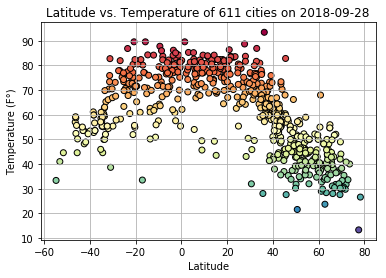

In [34]:
xlbl = "Latitude"
cmap = "Spectral"
units = "F°" 
lvt_plot = owmdf_plt(xlbl, "Temperature", units, cmap)

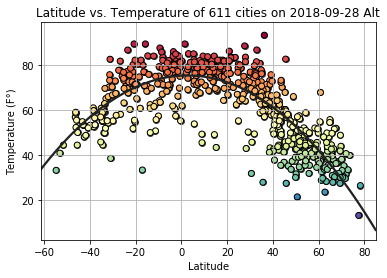

In [35]:
df_line = df_cleaned_weather.sort_values(xlbl, ascending=True)
lvt_prplot = owmdf_lplt(xlbl, "Temperature", df_line, units, cmap)

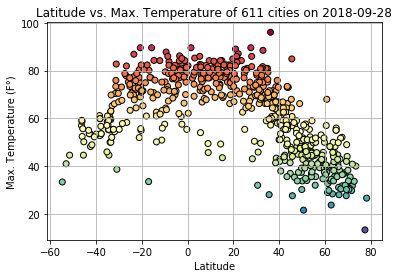

In [36]:
lvMaxT_plot = owmdf_plt(xlbl, "Max. Temperature", units, cmap)

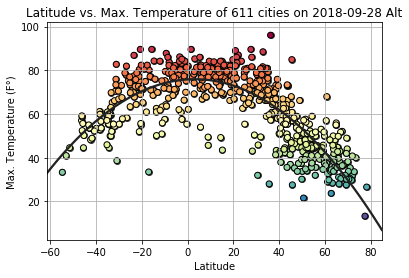

In [37]:
lvMaxT_prplot = owmdf_lplt(xlbl, "Max. Temperature", df_line, units, cmap)

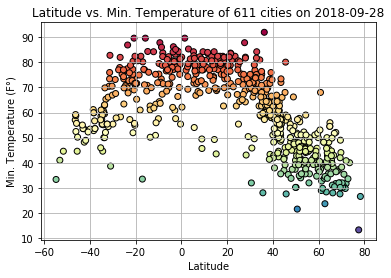

In [38]:
lvMinT_plot = owmdf_plt(xlbl, "Min. Temperature", units, cmap)

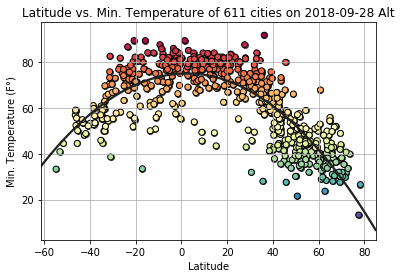

In [39]:
lvMinT_prplot = owmdf_lplt(xlbl, "Min. Temperature", df_line, units, cmap)

#### Latitude vs Humidity Plot

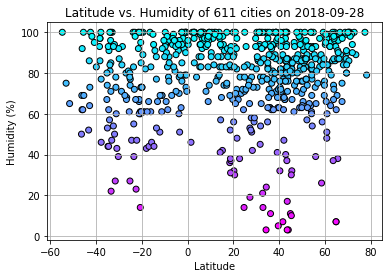

In [40]:
lvh_plot = owmdf_plt(xlbl, "Humidity", "%", "cool")

#### Latitude vs Cloudiness Plot

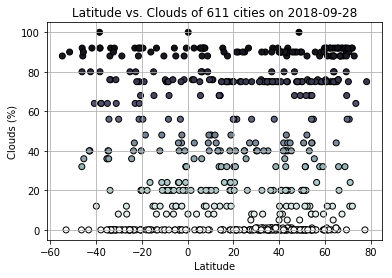

In [41]:
lvc_plot = owmdf_plt(xlbl, "Clouds", "%", "bone")

#### Latitude vs Windspeed Plot

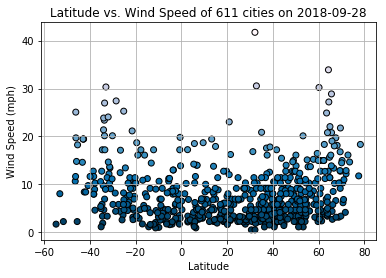

In [42]:
lvWS_plot = owmdf_plt(xlbl, "Wind Speed", "mph", "PuBu")